In [1]:
# as usual let's load up the modules we need
import pandas as pd
from matplotlib import pyplot as plt

# this line tells matplotlib to render all plots INLINE with the notebook
%matplotlib inline

# we need seaborn. it is normally sns for an alias
import seaborn as sns

In [6]:
# let's load the file for work
# and print the first five rows to verify proper load
# notice the index_col= setting the index to the FIRST column
#
df = pd.read_csv('Pokemon_fixed.csv', index_col=0)
df.tail(25)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
127,Pinsir,Bug,NaN,500,65,125,100,55,70,85,1,False
128,Tauros,Normal,NaN,490,75,100,95,40,70,110,1,False
129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
130,Gyarados,Water,Flying,540,95,125,79,60,100,81,2,False
131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False
132,Ditto,Normal,NaN,288,48,48,48,48,48,48,1,False
133,Eevee,Normal,NaN,325,55,55,50,45,65,55,1,False
134,Vaporeon,Water,NaN,525,130,65,60,110,95,65,2,False
135,Jolteon,Electric,NaN,525,65,65,60,110,95,130,2,False


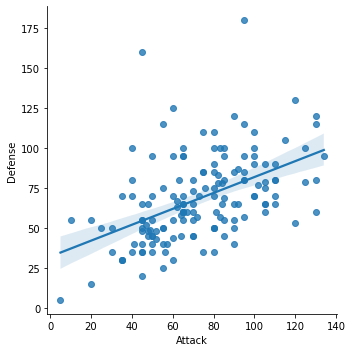

In [7]:
# Let's make our first plot. A scatter plot of the data
# and a line plot of the trend (We don't care about the line but...)
# notice the columns being used as input and the data= pointing
# to the dataframe to plot
# Also notice that the axes are actually labelled by default
sns.lmplot(x='Attack', y='Defense', data=df)

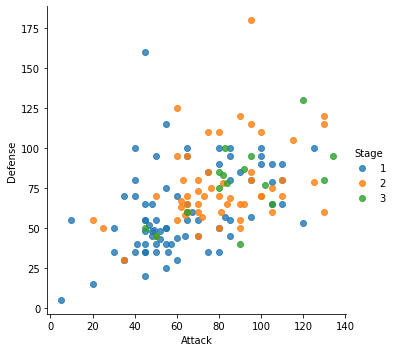

In [9]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

(0.0, 140.45)

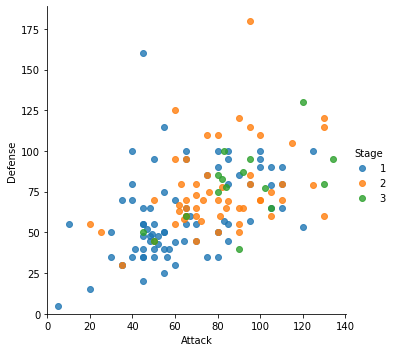

In [12]:
# fit_reg=False gets rid of the regression line as we don't need it
# hue="<COLUMN_NAME"> will pick colors based upon the values in the columb
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
# This limits the display to the lower and upper bounds set in the 
# parameter... so this will NOT display any NEGATIVE values...
plt.ylim(0, None)
plt.xlim(0, None)

<AxesSubplot:>

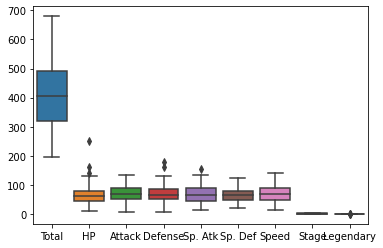

In [14]:
# Let's plot the data from each of the stats of the pokemon
# BUT we really don't need all of the numeric columns to be shown
# so we will fix this in the next cell...
sns.boxplot(data=df)

<AxesSubplot:>

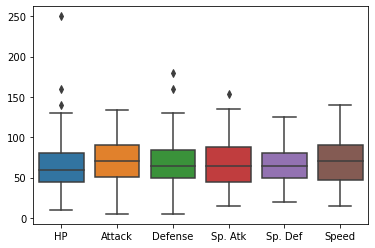

In [15]:
# TOTAL is not relevant as it is non-combat stat
# STAGE & LEGENDARY are also not relevant to our needs
# so let's get rid of them

# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

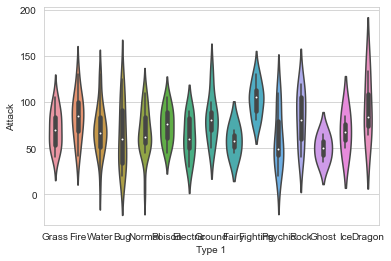

In [20]:
# Set theme
sns.set_style('whitegrid')

# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

In [17]:
# Let's set our colors so they match properly with the types
# We can get the hex codes from here
# https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates
# We make a list that specifies color and notice the nice comments that
# show these colors are listed in order of display in our chart
# The colors listed there are only for the humans to read the computer
# doesn't see that or use them in any way.
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

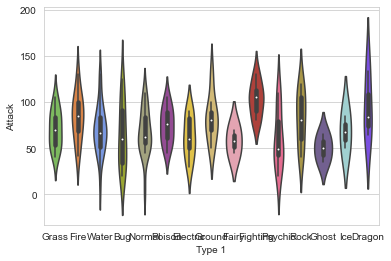

In [18]:
# Now we can pass that list to the violinplot function
# in the palette parameter... this will now bind the colors.
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

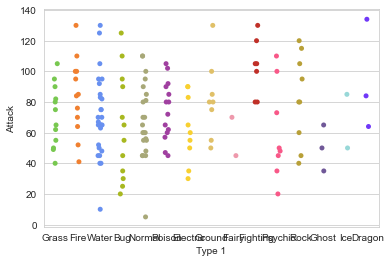

In [22]:
# Strip or swarm plots will show the individual datapoints
# rather than making the "violin" shape. This is great for 
# smaller sets of data...
# We want to use stripplot for this chart because swarm won't be able
# to plot all the data... a nice warning will let you know that fact...
#
sns.stripplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

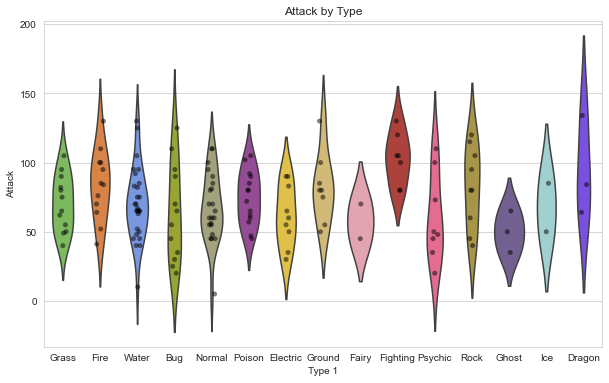

In [26]:
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.stripplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.50) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [30]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
print(melted_df.head(500))

           Name Type 1  Type 2     Stat  value
0     Bulbasaur  Grass  Poison       HP     45
1       Ivysaur  Grass  Poison       HP     60
2      Venusaur  Grass  Poison       HP     80
3    Charmander   Fire     NaN       HP     39
4    Charmeleon   Fire     NaN       HP     58
..          ...    ...     ...      ...    ...
495      Oddish  Grass  Poison  Sp. Atk     75
496       Gloom  Grass  Poison  Sp. Atk     85
497   Vileplume  Grass  Poison  Sp. Atk    110
498       Paras    Bug   Grass  Sp. Atk     45
499    Parasect    Bug   Grass  Sp. Atk     60

[500 rows x 5 columns]


In [31]:
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


<AxesSubplot:xlabel='Stat', ylabel='value'>

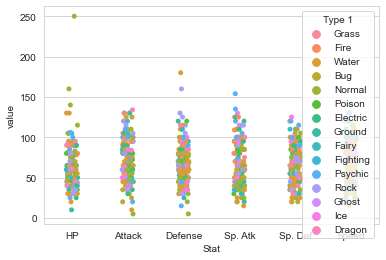

In [33]:
sns.stripplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')